## Regression: Medical Cost Personal Datasets
https://www.kaggle.com/mirichoi0218/insurance

** Dataset Information: **

1338 Health Insurance information

** Attribute Information: **

- age: age of primary beneficiary 
- sex: insurance contractor gender, female, male 
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 
- children: Number of children covered by health insurance / Number of dependents 
- smoker: Smoking 
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. 
- charges: Individual medical costs billed by health insurance

** Objective of this project **

predict insurance costs

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
df = pd.read_csv('insurance.csv')

In [3]:
# Inspect Data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Exploratory Data Analysis

In [7]:
# Encode Categorical to Dummy variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


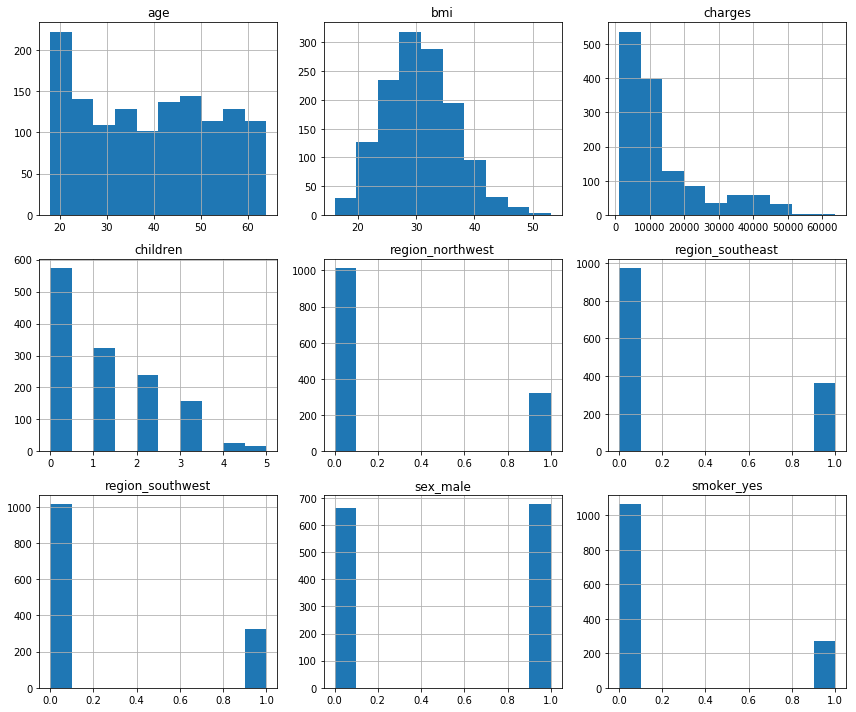

In [8]:
_ = df.hist(figsize=(12,10))
plt.tight_layout()

In [9]:
#sns.pairplot(df, size=2.5)
#plt.tight_layout()

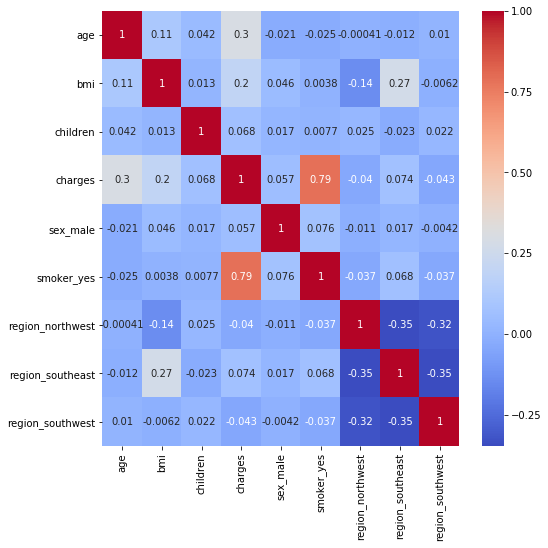

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [11]:
df.isnull().any()

age                 False
bmi                 False
children            False
charges             False
sex_male            False
smoker_yes          False
region_northwest    False
region_southeast    False
region_southwest    False
dtype: bool

## Data preprocessing

In [12]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

** Split Features & Class (or target) **

In [13]:
X = df.drop('charges', axis=1).values
y = df['charges'].values
print(X.shape,y.shape)

(1338, 8) (1338,)


** Split Train Test Sets **

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 8) (268, 8) (1070,) (268,)


** Scale Features **

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1)).ravel()
y_test = sc_y.transform(y_test.reshape(-1,1)).ravel()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 8) (268, 8) (1070,) (268,)


## Baseline Models

In [16]:
# Import libraries
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [17]:
models = []
#linear
models.append(('LR', LinearRegression()))
models.append(('RG', Ridge(random_state=seed)))
models.append(('LS', Lasso(random_state=seed)))
#non-linear
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor(random_state=seed)))
models.append(('SVM', SVR()))
#ensemble
models.append(('RF', RandomForestRegressor(n_estimators=100,random_state=seed)))
models.append(('XGB', XGBRegressor(random_state=seed)))

Model	MSE: mean (std)
LR	-0.256 (0.041)
RG	-0.256 (0.041)
LS	-1.002 (0.128)
KNN	-0.217 (0.031)
DT	-0.317 (0.064)
SVM	-0.160 (0.036)
RF	-0.168 (0.033)
XGB	-0.144 (0.030)


Text(0,0.5,'MSE')

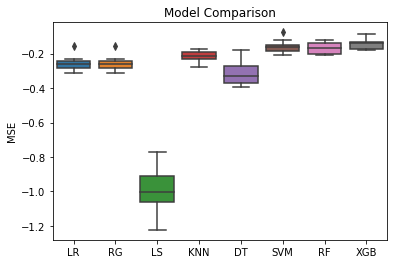

In [18]:
# cross validation
np.random.seed(seed)
kfold = KFold(n_splits=10, random_state=seed)
scoring='neg_mean_squared_error'
names = []
results = []
print('Model\tMSE: mean (std)')
for name,model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)  
    results.append(cv_results)
    names.append(name)    
    print('{}\t{:0.3f} ({:0.3f})'.format(name, cv_results.mean(), cv_results.std()))

# visualize results
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.title('Model Comparison')
plt.ylabel('MSE')

## Parameter Tuning
Top 4 algorithms: XGB, SVM, RF, KNN

In [19]:
# define functions for grid search
def default_model_perfomance(model):
    cv = cross_val_score(model, X_train, y_train,cv=kfold, scoring=scoring)
    print(model.get_params())
    print('\nMSE of train set: {:0.3f} ({:0.3f})'.format(cv.mean(), cv.std()))

def best_model_performance(model,param_grid):
    # grid search
    np.random.seed(seed)
    scoring='neg_mean_squared_error'
    kfold = KFold(n_splits=10, random_state=seed)
    grid_search = GridSearchCV(model, param_grid=param_grid,cv=kfold, verbose=1, scoring=scoring)
    grid_result = grid_search.fit(X_train,y_train)

    # results
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%.3f (%.3f) with: %r" % (mean, stdev, param))

    # best
    print("\nBest MSE of train set: {:0.3f} using {}".format(grid_result.best_score_,grid_result.best_params_))
    
    # evaluate test set
    #y_true, y_pred = y_test, grid_search.predict(X_test)
    #print(mean_squared_error(y_true, y_pred))
    #print(r2_score(y_true, y_pred))

#### Model 1: XGBoost

In [20]:
# Default
model = XGBRegressor(n_estimators=100,random_state=seed)
default_model_perfomance(model)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 101, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}

MSE of train set: -0.144 (0.030)


In [21]:
# Grid Search
model = XGBRegressor(random_state=seed)
n_estimators = [50, 100, 200, 300]
max_depth = [3, 5, 7]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
best_model_performance(model,param_grid)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
-0.140 (0.034) with: {'max_depth': 3, 'n_estimators': 50}
-0.144 (0.030) with: {'max_depth': 3, 'n_estimators': 100}
-0.155 (0.026) with: {'max_depth': 3, 'n_estimators': 200}
-0.162 (0.026) with: {'max_depth': 3, 'n_estimators': 300}
-0.151 (0.033) with: {'max_depth': 5, 'n_estimators': 50}
-0.164 (0.026) with: {'max_depth': 5, 'n_estimators': 100}
-0.181 (0.027) with: {'max_depth': 5, 'n_estimators': 200}
-0.191 (0.029) with: {'max_depth': 5, 'n_estimators': 300}
-0.171 (0.033) with: {'max_depth': 7, 'n_estimators': 50}
-0.186 (0.034) with: {'max_depth': 7, 'n_estimators': 100}
-0.202 (0.036) with: {'max_depth': 7, 'n_estimators': 200}
-0.206 (0.035) with: {'max_depth': 7, 'n_estimators': 300}

Best MSE of train set: -0.140 using {'max_depth': 3, 'n_estimators': 50}


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   16.7s finished


[ 0.38550726  0.30724639  0.11884058  0.0057971   0.12463768  0.0057971
  0.01449275  0.03768116]


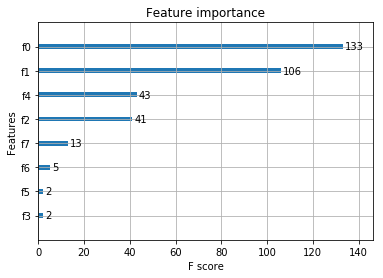

In [22]:
# Feature Importance
from xgboost import plot_importance  
model = XGBRegressor(max_depth=3, n_estimators=50, random_state=seed)                      
model.fit(X_train,y_train)
print(model.feature_importances_)
plot_importance(model)

#### Model 2: SVM

In [23]:
# Default
model = SVR()
default_model_perfomance(model)

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

MSE of train set: -0.160 (0.036)


In [24]:
# Grid Search
model = SVR()
C = [0.001, 0.01, 0.1, 1, 10]
gamma = [0.001, 0.01, 0.1, 1, 10]
param_grid = dict(C=C,gamma=gamma)
best_model_performance(model,param_grid)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
-1.106 (0.170) with: {'C': 0.001, 'gamma': 0.001}
-1.091 (0.169) with: {'C': 0.001, 'gamma': 0.01}
-1.061 (0.167) with: {'C': 0.001, 'gamma': 0.1}
-1.103 (0.170) with: {'C': 0.001, 'gamma': 1}
-1.108 (0.170) with: {'C': 0.001, 'gamma': 10}
-1.088 (0.169) with: {'C': 0.01, 'gamma': 0.001}
-0.949 (0.159) with: {'C': 0.01, 'gamma': 0.01}
-0.729 (0.132) with: {'C': 0.01, 'gamma': 0.1}
-1.064 (0.170) with: {'C': 0.01, 'gamma': 1}
-1.104 (0.171) with: {'C': 0.01, 'gamma': 10}
-0.924 (0.157) with: {'C': 0.1, 'gamma': 0.001}
-0.447 (0.087) with: {'C': 0.1, 'gamma': 0.01}
-0.236 (0.042) with: {'C': 0.1, 'gamma': 0.1}
-0.770 (0.129) with: {'C': 0.1, 'gamma': 1}
-1.076 (0.173) with: {'C': 0.1, 'gamma': 10}
-0.442 (0.088) with: {'C': 1, 'gamma': 0.001}
-0.211 (0.046) with: {'C': 1, 'gamma': 0.01}
-0.160 (0.036) with: {'C': 1, 'gamma': 0.1}
-0.304 (0.036) with: {'C': 1, 'gamma': 1}
-0.819 (0.142) with: {'C': 1, 'gamma': 10}
-0.291 (0.07

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   17.8s finished


#### Model 3: RandomForest

In [25]:
# Default
model = RandomForestRegressor(n_estimators=100,random_state=seed)
default_model_perfomance(model)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}

MSE of train set: -0.168 (0.033)


In [26]:
# Grid Search
model = RandomForestRegressor(random_state=seed)
n_estimators = [100,200,500]
param_grid = dict(n_estimators=n_estimators)
best_model_performance(model,param_grid)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   23.8s finished


-0.168 (0.033) with: {'n_estimators': 100}
-0.167 (0.033) with: {'n_estimators': 200}
-0.166 (0.033) with: {'n_estimators': 500}

Best MSE of train set: -0.166 using {'n_estimators': 500}


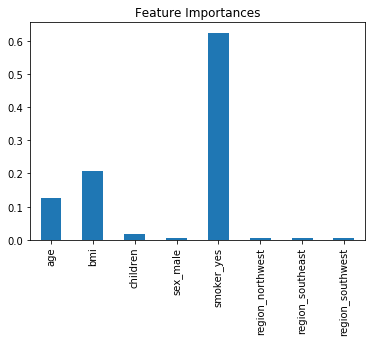

In [27]:
# Feature Importance
model = RandomForestRegressor(n_estimators=500,random_state=seed)
model.fit(X_train, y_train)
pd.DataFrame(data=model.feature_importances_,
             index=df.drop('charges',axis=1).columns).plot(kind='bar',legend=False,
                                                        title='Feature Importances')

#### Model 4: KNN

In [28]:
# Default
model = KNeighborsRegressor()
default_model_perfomance(model)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

MSE of train set: -0.217 (0.031)


In [29]:
# Grid Search
model = KNeighborsRegressor()
n_neighbors = [3,5,7,9,15]
param_grid = dict(n_neighbors=n_neighbors)
best_model_performance(model,param_grid)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
-0.217 (0.028) with: {'n_neighbors': 3}
-0.217 (0.031) with: {'n_neighbors': 5}
-0.207 (0.036) with: {'n_neighbors': 7}
-0.212 (0.034) with: {'n_neighbors': 9}
-0.221 (0.035) with: {'n_neighbors': 15}

Best MSE of train set: -0.207 using {'n_neighbors': 7}


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


## Final Model: XGBoost

** Params: n_estimators=50 **

In [30]:
final_model = XGBRegressor(n_estimators=50,random_state=seed)
final_model.fit(X_train, y_train)
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train, final_model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train, final_model.predict(X_train))))

MSE of train set: 0.116
R^2 of train set: 0.884


** Save and load the final model **

In [31]:
#save model to disk
import pickle
filename='model.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [32]:
#load the model from disk
final_model = pickle.load(open(filename,'rb'))
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train, final_model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train, final_model.predict(X_train))))

MSE of train set: 0.116
R^2 of train set: 0.884


## Model Evaluation with Test set

In [33]:
# predict class with test set (new, unseen)
y_pred = final_model.predict(X_test)
print('MSE of test set: {:0.3f}'.format(mean_squared_error(y_test, final_model.predict(X_test))))
print('R^2 of test set: {:0.3f}'.format(r2_score(y_test, final_model.predict(X_test))))

MSE of test set: 0.129
R^2 of test set: 0.865


In [34]:
# to original scale 
print('MSE of test set: {:0.3f}'
      .format(mean_squared_error(sc_y.inverse_transform(y_test),
                                 sc_y.inverse_transform(final_model.predict(X_test)))))
print('R^2 of test set: {:0.3f}'.format(r2_score(y_test,final_model.predict(X_test))))

MSE of test set: 19014394.720
R^2 of test set: 0.865


(0, 65000)

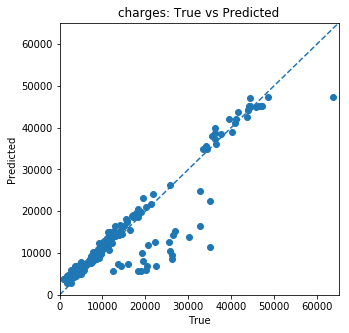

In [35]:
maxVal = 65000
plt.figure(figsize=(5,5))
plt.scatter(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_pred))
plt.plot([0,maxVal], [0,maxVal], '--')
plt.title('charges: True vs Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.xlim([0,maxVal])
plt.ylim([0,maxVal])

(0, 70)

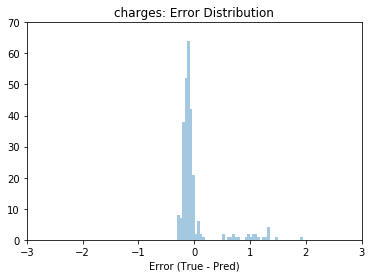

In [36]:
sns.distplot((y_test-y_pred.ravel()), bins=50, kde=False, axlabel='Error (True - Pred)')
plt.title('charges: Error Distribution')
plt.xlim([-3,3])
plt.ylim([0,70])

## Summary

- Best model: ** XGBoost ** w/ n_estimators=50


- RMSE / R2 score of test set: ** $4360 / 0.865 **